# Demos: Lecture 2

## Demo 1: QNodes

In [1]:
import pennylane as qml
import numpy as np

In [2]:
dev = qml.device("default.qubit", wires=1, shots=100)

def my_quantum_function():
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)
    qml.PauliX(wires=0)
    return qml.sample()

In [3]:
my_qnode = qml.QNode(my_quantum_function, dev)

In [4]:
result = my_qnode()

In [5]:
result

tensor([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1], requires_grad=True)

In [6]:
drawer = qml.draw(my_qnode)
print(drawer())

 0: ──H──Z──X──┤ Sample[basis] 



(<Figure size 432x144 with 1 Axes>, <matplotlib.axes._axes.Axes object at 0x7f76d303e370>)


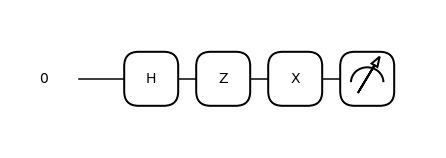

In [9]:
qml.drawer.use_style('black_white')
drawer = qml.draw_mpl(my_qnode)
print(drawer())

## Demo 2: relative phases

In [13]:
@qml.qnode(dev)
def rotate_with_rz(theta):
    qml.Hadamard(wires=0)
    qml.RZ(theta, wires=0)
    return qml.sample()

In [14]:
rotate_with_rz(0.2)

tensor([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0], requires_grad=True)

In [15]:
np.mean(rotate_with_rz(0.7))

tensor(0.49, requires_grad=True)

In [18]:
@qml.qnode(dev)
def rotate_with_rz(theta):
    qml.Hadamard(wires=0)
    qml.RZ(theta, wires=0)
    return qml.probs()

In [22]:
rotate_with_rz(0.6)

tensor([0.47, 0.53], requires_grad=True)

In [23]:
@qml.qnode(dev)
def rotate_with_rx(theta):
    qml.RX(theta, wires=0)
    return qml.sample()

In [24]:
rotate_with_rx(1.5)

tensor([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], requires_grad=True)

In [35]:
np.mean(rotate_with_rx(1.5))

tensor(0.37, requires_grad=True)

In [25]:
@qml.qnode(dev)
def rotate_with_rx(theta):
    qml.RX(theta, wires=0)
    return qml.state()

(<Figure size 288x144 with 1 Axes>, <matplotlib.axes._axes.Axes object at 0x7f76d2face20>)


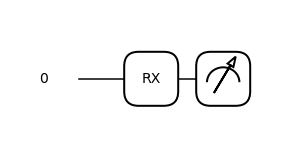

In [26]:
print(qml.draw_mpl(rotate_with_rx)(1.5))

In [27]:
rotate_with_rx(1.5)

tensor([0.73168887+0.j        , 0.        -0.68163876j], requires_grad=True)

In [28]:
rotate_with_rx(-1.5)

tensor([0.73168887+0.j        , 0.        +0.68163876j], requires_grad=True)

In [31]:
@qml.qnode(dev)
def rotate_with_adjoint(theta):
    qml.adjoint(qml.RX)(theta, wires=0)
    return qml.state()

In [32]:
rotate_with_adjoint(1.5)

tensor([0.73168887+0.j        , 0.        +0.68163876j], requires_grad=True)

## Demo 3: universality of Pauli rotations

The Hadamard gate three ways.

In [23]:
def hadamard():
    qml.Hadamard(wires=0)

def hadamard_with_rzrx():
    qml.RZ(np.pi/2, wires=0)
    qml.RX(np.pi/2, wires=0)
    qml.RZ(np.pi/2, wires=0)
    
def hadamard_with_rot():
    qml.Rot(np.pi, np.pi/2, 0, wires=0)

In [6]:
hadamard_mat = qml.transforms.get_unitary_matrix(hadamard)
print(hadamard_mat())

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


In [9]:
hadamard_with_rzrx_mat = qml.transforms.get_unitary_matrix(hadamard_with_rzrx)
print(hadamard_with_rzrx_mat())

[[1.11022302e-16-0.70710678j 0.00000000e+00-0.70710678j]
 [0.00000000e+00-0.70710678j 1.11022302e-16+0.70710678j]]


In [10]:
mat1 = hadamard_mat()
mat2 = hadamard_with_rzrx_mat()

In [12]:
np.allclose(mat1, mat2)

False

In [13]:
np.round(mat2, decimals=4)

array([[0.-0.7071j, 0.-0.7071j],
       [0.-0.7071j, 0.+0.7071j]])

In [16]:
np.round(np.dot(mat1, np.conj(mat2.T)), decimals=4)

array([[ 0.+1.j,  0.-0.j],
       [ 0.+0.j, -0.+1.j]])

In [24]:
hadamard_with_rot_mat = qml.transforms.get_unitary_matrix(hadamard_with_rot)
mat3 = hadamard_with_rot_mat()

In [25]:
np.round(mat3, decimals=4)

array([[ 0.-0.7071j, -0.-0.7071j],
       [ 0.-0.7071j,  0.+0.7071j]])

## Demo 4: expectation values 

In [57]:
dev = qml.device('default.qubit', wires=1)
  
@qml.qnode(dev)
def measure_z():
    qml.RX(2*np.pi/3, wires=0)    
    return qml.expval(qml.PauliZ(0))
    #return qml.state()

In [58]:
measure_z()

tensor(-0.8660254, requires_grad=True)

In [59]:
dev = qml.device('default.qubit', wires=1, shots=1000)
  
@qml.qnode(dev)
def measure_z():
    qml.RX(2*np.pi/3, wires=0)    
    return qml.expval(qml.PauliZ(0))
    #return qml.state()

In [62]:
measure_z()

tensor(-0.868, requires_grad=True)

In [ ]:
dev = qml.device('default.qubit', wires=1, shots=1000)
  
@qml.qnode(dev)
def measure_z():
    qml.RX(2*np.pi/3, wires=0)    
    return qml.sample(qml.PauliZ(0))
    #return qml.state()

## Demo 5: basis rotation

In [ ]:
dev = qml.device('default.qubit', wires=1, shots=100)
  
def convert_from_y_basis():
    qml.adjoint(qml.S)(wires=0)
    qml.Hadamard(wires=0)
    
@qml.qnode(dev)
def rotate_basis(x, y, z):
    qml.RX(x, wires=0)
    qml.RY(y, wires=0)
    qml.RZ(z, wires=0)
    
    convert_from_y_basis()
    
    return qml.samples()

In [ ]:
dev = qml.device('default.qubit', wires=1, shots=100)
  
def convert_to_y_basis():
    qml.Hadamard(wires=0)
    qml.S(wires=0)
    
@qml.qnode(dev)
def rotate_basis(x, y, z):
    qml.RX(x, wires=0)
    qml.RY(y, wires=0)
    qml.RZ(z, wires=0)
    
    qml.adjoint(convert_to_y_basis)()
    
    return qml.samples()